# Notebook exercise 5

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


## 05.1

### Assignment


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin? 
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?

### Solution

In general, calculating the mean value or other quantities related to a known distribution is not an easy procedure. One way to rapidly obtain an estimate of the desired value is to use a collection of random points distributed according to the distribution function. The Metropolis algorithm is a method to obtain these points.

This algorithm exploits rejection techniques: given a point x of the system, at every step it extract a random points which is accepted with a probability given by
\begin{equation}
    P = min[1, \frac{T(y,x) p(x)}{T(x,y) p(y)}]
\end{equation}
where $p(x)$ is the distribution function and $T(x,y)$ is the transition function. If $T(x,y)$ is simmetric the acceptance probability becomes $P = min[1, \frac{p(x)}{p(y)}]$. To make the algorithm efficent, it's important to choose a value for the step lenght of the proposed move in order to obtain an acceptance ratio around $50 \%$. 

For the exercise I obtain $10^6$ points distributed like the two functions given by the assignment, using a uniform transition probability. In order to generate this points I created the class ```q_state```, which present a function ```thermalization``` that allows to set a acceptable step lenght, and the function ```eval_radius``` that exploits the $M(RT)^2$ discussed above to evaluate the mean radius of the distribution. In the figure below are rapresented some of points obtained for the two state. 

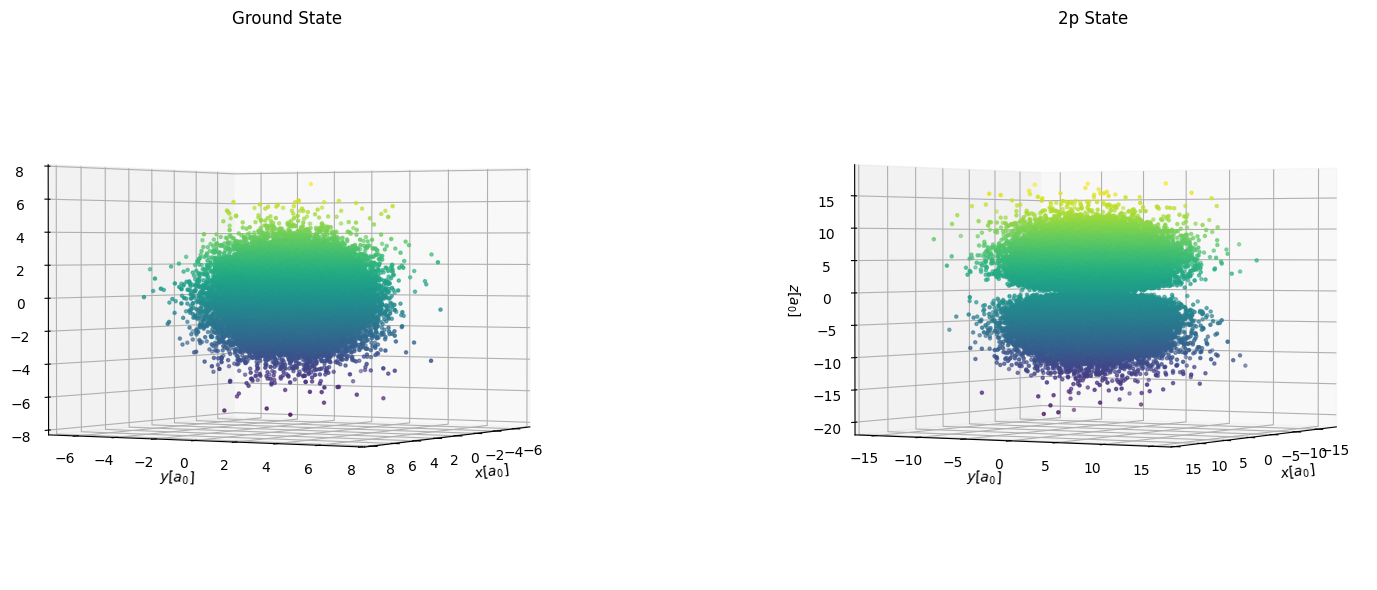

In [3]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt

#load data
data_gs = np.loadtxt("data/gs.xyz")
data_2p = np.loadtxt("data/2p.xyz")

th = 1
phi = 30

fig = plt.figure(figsize=(18,6))

#plot of the gs distribution
ax1 = fig.add_subplot(1,2,1,projection='3d')
ax1.scatter(data_gs[:,0], data_gs[:,1], data_gs[:,2], c=data_gs[:,2], marker='.')
ax1.set_title('Ground State')
ax1.set_xlabel(r'$x [a_{0}]$')
ax1.set_ylabel(r'$y [a_{0}]$')
ax1.set_zlabel(r'$z [a_{0}]$')
ax1.view_init(elev=th, azim=phi)

#plot of the 2p distribution
ax2 = fig.add_subplot(1,2,2,projection='3d')
ax2.scatter(data_2p[:,0], data_2p[:,1], data_2p[:,2], c=data_2p[:,2], marker='.')
ax2.set_title('2p State')
ax2.set_xlabel(r'$x [a_{0}]$')
ax2.set_ylabel(r'$y [a_{0}]$')
ax2.set_zlabel(r'$z [a_{0}]$')
ax2.view_init(elev=th, azim=phi)

plt.tight_layout()
plt.show()

The mean value of this point, obtained with data blocking, is an estimation of $\left\langle r \right\rangle$ for the two distribution. In the two figures below I reported the estimation confronted with the theoretical value. These plots show the precision of this method. We obtain approximately the same result with a Gaussian transfer function. 

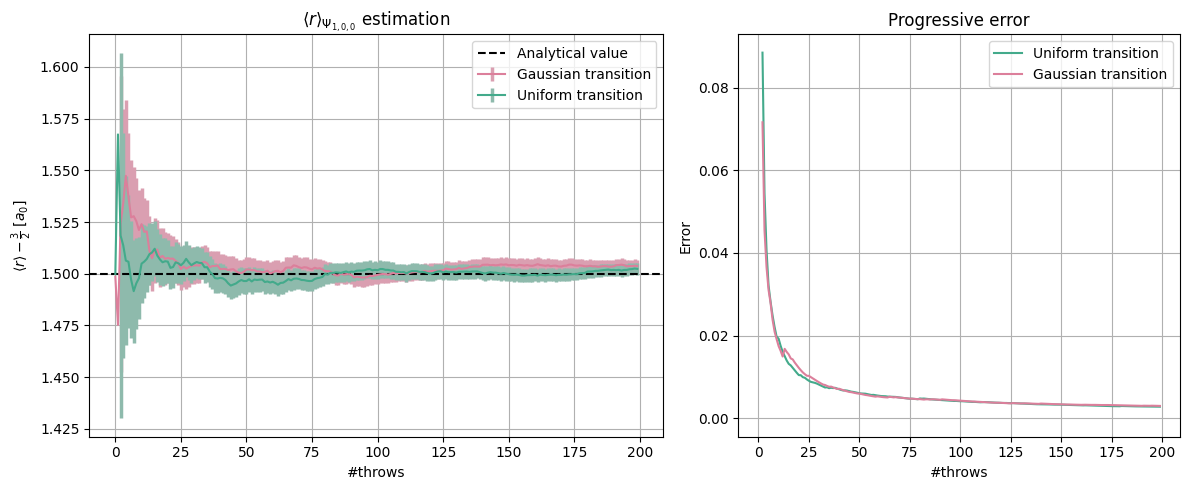

In [27]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt

#load data
r_gs = np.loadtxt("data/gs.dat")
r_gs_gauss = np.loadtxt("data/gs_gaussian.dat")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1.3, 1]})  

axes[0].errorbar(r_gs_gauss[:,0], r_gs_gauss[:,1], yerr=r_gs_gauss[:,2], color='#DC7F9B', ecolor="#DA9FB1", elinewidth=2.5, capsize=0, label='Gaussian transition')
axes[0].errorbar(r_gs[:,0], r_gs[:,1], yerr=r_gs[:,2], color='#43AA8B', ecolor="#8EBAAC", elinewidth=2.5, capsize=0, label='Uniform transition')
axes[0].axhline(y=1.5, color='black', linestyle='--', label='Analytical value')
axes[0].set_title(r'$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ estimation')
axes[0].set_xlabel('#throws')
axes[0].set_ylabel(r'$\left\langle r \right\rangle - \frac{3}{2}$ $[a_{0}]$')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(r_gs[:,0], r_gs[:,2], color='#43AA8B', label='Uniform transition')
axes[1].plot(r_gs_gauss[:,0], r_gs_gauss[:,2], color='#DC7F9B', label='Gaussian transition')
axes[1].set_title("Progressive error")
axes[1].set_xlabel('#throws')
axes[1].set_ylabel('Error')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

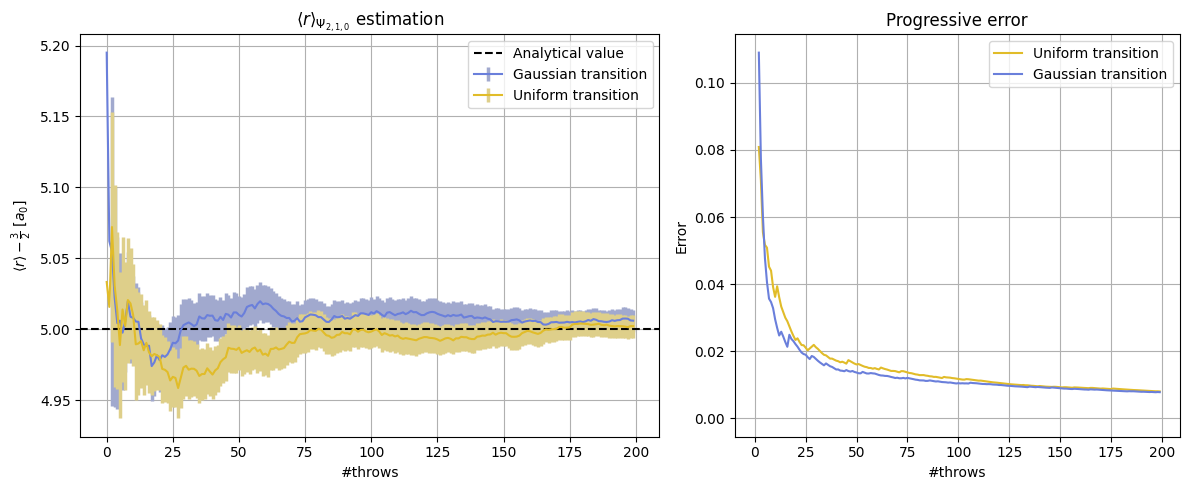

In [28]:
#load data
r_2p = np.loadtxt("data/2p.dat")
r_2p_gauss = np.loadtxt("data/2p_gaussian.dat")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1.3, 1]})  

axes[0].errorbar(r_2p_gauss[:,0], r_2p_gauss[:,1], yerr=r_2p_gauss[:,2], color='#6A7FDB', ecolor="#A1A9CE", elinewidth=2.5, capsize=0, label='Gaussian transition')
axes[0].errorbar(r_2p[:,0], r_2p[:,1], yerr=r_2p[:,2], color='#E1BC29', ecolor="#DECF8A", elinewidth=2.5, capsize=0, label='Uniform transition')
axes[0].axhline(y=5, color='black', linestyle='--', label='Analytical value')
axes[0].set_title(r'$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ estimation')
axes[0].set_xlabel('#throws')
axes[0].set_ylabel(r'$\left\langle r \right\rangle - \frac{3}{2}$ $[a_{0}]$')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(r_2p[:,0], r_2p[:,2], color='#E1BC29', label='Uniform transition')
axes[1].plot(r_2p_gauss[:,0], r_2p_gauss[:,2], color='#6A7FDB', label='Gaussian transition')
axes[1].set_title("Progressive error")
axes[1].set_xlabel('#throws')
axes[1].set_ylabel('Error')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()